# E-commerce. Prioritization of hypotheses and analysis of a/b - test

# Open the data
<a id="start"></a>

In [281]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
import math
from scipy import stats as st
from IPython.display import display_html
from itertools import chain,cycle
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [282]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [283]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [284]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [285]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [286]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [287]:
orders['date'] = pd.to_datetime(orders['date']) #change type of the data

In [288]:
orders.info() #check out changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [289]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [290]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [291]:
visitors['date'] = pd.to_datetime(visitors['date']) #change type of the column

In [292]:
visitors.info() #проверяем внесенные изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [293]:
visitors.duplicated().sum()

0

# Prioritize hypotheses
<a id="hyp"></a>

In [294]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [295]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [296]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False) #get hypotheses by ICE ratio

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [297]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [298]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False) #get hypotheses by RICE ratio

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [299]:
pd.options.display.max_colwidth = 200 #change quantity of symbols for reading whole sentences of hypotheses 

In [300]:
hypothesis['Hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

**Conclusion for hypotheses**

RICE hypotheses are preferable due to an important element "Reach". Hypotheses #7 and #0 are both in the TOP-3 position in the list. 

# Analyze of A/B-test
<a id="a/b"></a>

**3.1 cumulative revenue by the groups**
<a id="cum"></a>

In [301]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [302]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [303]:
dateGroups = orders[['date', 'group']].drop_duplicates() #unique pairs of date and groups

In [304]:
ordersAggregated = dateGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date':'max', 'group':'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue':'sum'}), axis=1). sort_values(by=['date', 'group'])#

#df with groups, orders and revenue

In [305]:
ordersAggregated 

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [306]:
visitorsAggregated = dateGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date':'max', 'group':'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])

#aggregate visitors on date for every group

In [307]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [308]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) #merge two datasets

In [309]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] #rename columns

In [310]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [311]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']] 
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]
# query on the group

In [312]:
cumulativeRevenueA.head(5)

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [313]:
cumulativeRevenueB.head(5)

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


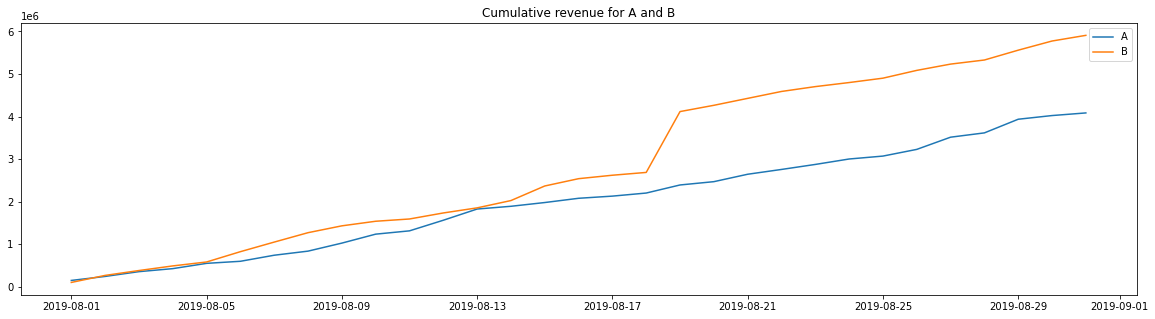

In [314]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative revenue for A and B')
plt.legend() 
plt.show()
#create a plot

Plot group B lag behind group A at the start of the way. However, group B has rapidly grown ( from 2,5 mln to 4 mln). And in the next way we can see a symptom of stabilisation

**3.2 plot of cumulative AOV by the groups**
<a id="cum/gr"></a>

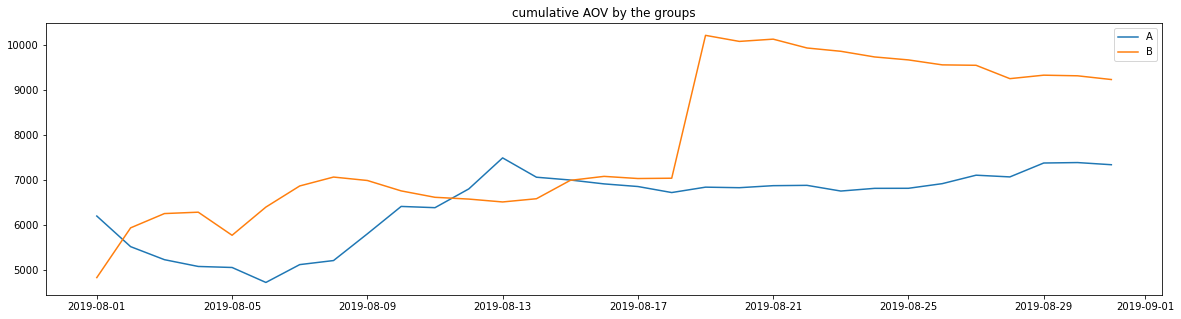

In [315]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('cumulative AOV by the groups')
plt.show()

We can see rapid grow in plot B. Further decreases and then it is looks like stabilization

**3.3 plot with changes in cumulative revenue from group "B" to group "A"**
<a id="a_b"></a>

In [316]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])#делаем общий датафрейм

In [317]:
mergedCumulativeRevenue.head(6)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101
5,2019-08-06,598401,127,824337,129


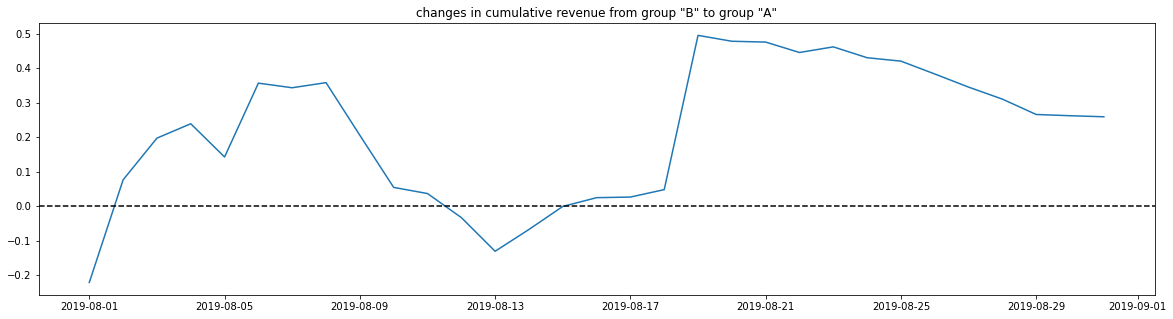

In [318]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('changes in cumulative revenue from group "B" to group "A"')
plt.show()

strong jumps on the graph, there are outliers in the data

**3.4 plot of cumulative conversion by the groups**
<a id="conva-b"></a>

In [319]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors'] #сount the conversion

In [320]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
#query datasets by groups

In [321]:
cumulativeDataA.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


In [322]:
cumulativeDataB.tail(5)

,date,group,orders,buyers,revenue,visitors,conversion
53,2019-08-27,B,548,504,5232260,16523,0.033166
55,2019-08-28,B,576,526,5328268,17177,0.033533
57,2019-08-29,B,596,544,5559398,17708,0.033657
59,2019-08-30,B,620,567,5774631,18198,0.034070
61,2019-08-31,B,640,586,5907760,18916,0.033834


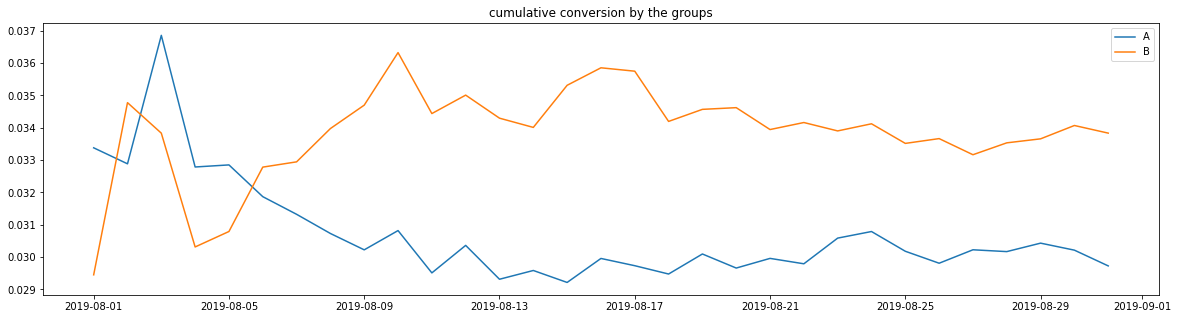

In [323]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.rcParams["figure.figsize"] = (20,5)
plt.title('cumulative conversion by the groups')
plt.legend()
plt.show()

The absolute value of fluctuation is from 3 to 4%

**3.5 plot with changes in cumulative conversion from group "B" to group "A"**
<a id="conv_a-b"></a>

In [324]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

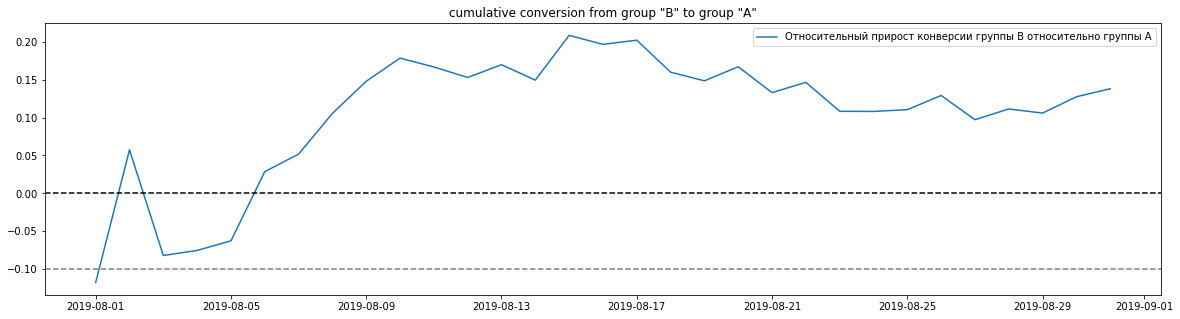

In [325]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('cumulative conversion from group "B" to group "A"')
plt.show()


from the medium of the plot group B is declining and may be stabilizing

**3.6 scatter plot quantity of orders by users**
<a id="users"></a>

In [326]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [327]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})) #группируеим данные по пользователям и кол-ву заказов

In [328]:
ordersByUsers.columns = ['visitorId', 'orders']

In [329]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


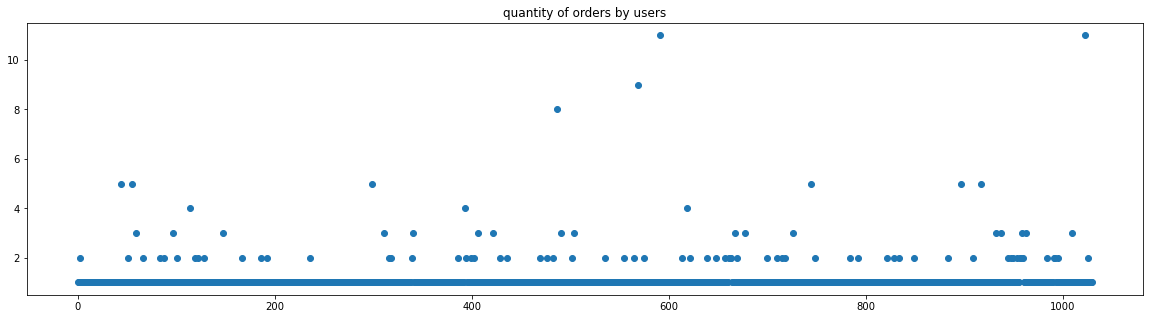

In [330]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('quantity of orders by users')
plt.show()

a lot of users did not more than 2 orders

**3.7 percentiles of the quantity of the orders by a user**
<a id="per_us"></a>

In [331]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Only 5 percent did more than two orders

**3.8 scatter plot of the order price**
<a id="rev"></a>

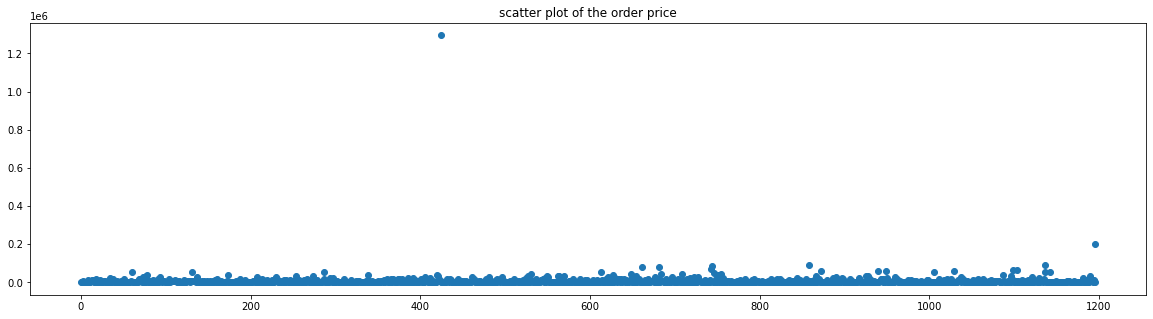

In [332]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('scatter plot of the order price')
plt.scatter(x_values, orders['revenue']) 
plt.show()

**3.9 percentiles of the orders price**
<a id="per_rev"></a>

In [333]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

not more 5% expensive than 28 000

**3.10 statistical significance between conversion in the groups by "raw" data**
<a id="stat_free"></a>

In [334]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [335]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [336]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)

In [337]:
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [338]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [339]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)

In [340]:
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [341]:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

In [342]:
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [343]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

In [344]:
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

In [345]:
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

In [346]:
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [347]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

In [348]:
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

In [349]:
df =  (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
#объединяем полученные данные по датасетам в один

In [350]:
df.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [351]:
ordersByUsersA =  (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

#группируем данные по пользователям и заказам в группе А

In [352]:
ordersByUsersB =  (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']
#группируем данные по пользователям и заказам в группе В

In [353]:
ordersByUsersA.describe()

,visitorId,orders
count,5.030000e+02,503.000000
mean,2.159779e+09,1.107356
std,1.218811e+09,0.517046
min,8.300375e+06,1.000000
25%,1.067031e+09,1.000000
50%,2.219162e+09,1.000000
75%,3.160697e+09,1.000000
max,4.278983e+09,7.000000


In [354]:
ordersByUsersB.describe()

,visitorId,orders
count,5.860000e+02,586.000000
mean,2.126231e+09,1.092150
std,1.247753e+09,0.443421
min,5.114589e+06,1.000000
25%,1.041653e+09,1.000000
50%,2.111874e+09,1.000000
75%,3.170684e+09,1.000000
max,4.283872e+09,6.000000


Н0 - conversion by the row data between A and B are equal

H1 - conversion by the row data between A and B are unequal

In [355]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [356]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [357]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format((df['ordersPerDateB'].sum()/df['visitorsPerDateB'].sum())/(df['ordersPerDateA'].sum()/df['visitorsPerDateA'].sum())-1))

0.017
0.138


p-value less than 0.05, it means that H0 was rejected. Analysis of the raw data show that between groups have statistically significant differences. The relative increase in conversion B to conversion A is 13.8%

**3.11 statistical significance between AOV in the groups by "raw" data**
<a id="stat_av_free"></a>

Н0 - AOV by the raw data between A and B are equal

H1 - AOV by the raw data between A and B are unequal

In [358]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


p-value more than 0.05, it means that H0 couldn't be rejected. Analysis of the raw data show that between groups have statistically significant differences. The relative increase AOV B to AOV A is 25.9%

**3.12 statistical significance between conversion in the groups by processed data**
<a id="stat_prep"></a>

In [359]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [360]:
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

In [361]:
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [362]:
abnormalUsers.shape

(74,)

In [363]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [364]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Н0 - conversion by the processed data between A and B are equal

H1 - conversion by the processed data between A and B are unequal

In [365]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


p-value less than 0.05, it means that H0 was rejected. Analysis of the processed data show that between groups have statistically significant differences. The relative increase in conversion B to conversion A is 17.3%

**3.13 statistical significance between AOV in the groups by processed data**
<a id="stat_av_prep"></a>

In [366]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


p-value всё равно больше 0.05, это значит, что нулевую гипотезу НЕ отвергаем. Однако, теперь в лидерах группа А со статистическим показателям в 2%

p-value more than 0.05 it means that H0 couldn't be rejected. However, the relative increase from AOV A to AOV B is 2% 

**3.14 Result А/В-test**
<a id="theend"></a>

We can finish and fixate on the victory of group "B". This group has higher conversion and is stable. Group "A" has more AOV by 2% in processed data, but group "B" give us more buyers because conversion higher